Which of the following model types is more prone to overfitting?

- [ ] Linear Regression
- [x] k Nearest Neighbors

Looked at two methods:
1. Uniform
    - weights all points equally
2. Distance
    - takes into account how far away the neighbors are, and weighs nearer neighbors more heavily

k nearest neighbors has a problem with overfitting on the training set

***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("california-housing.csv")

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


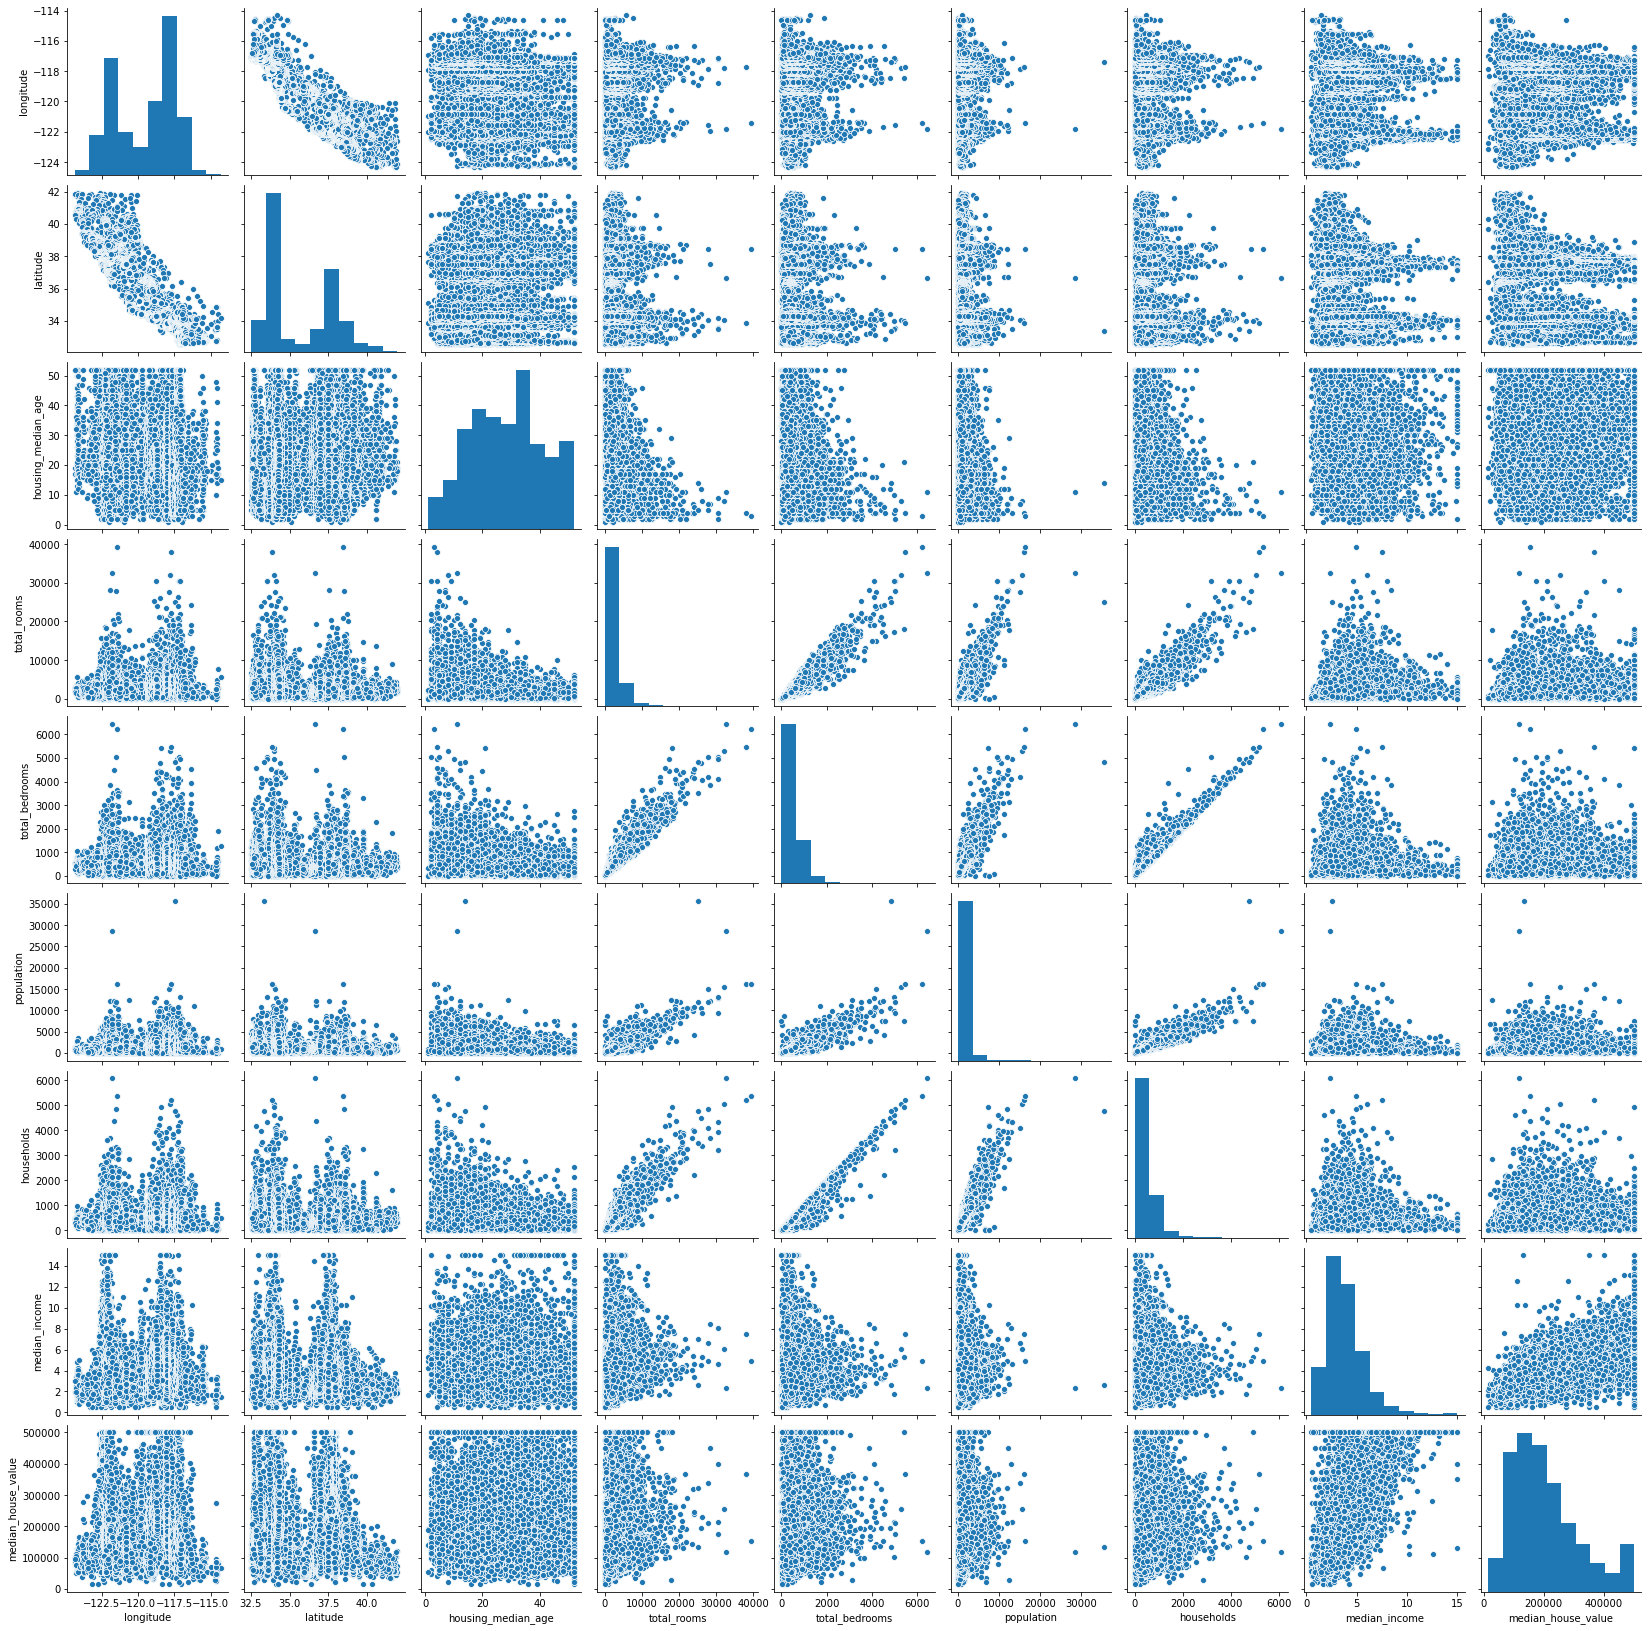

In [4]:
sns.pairplot(df)

What do we see?

1. A lot of outliers
2. A lot of scatter
3. Some plots have two peaks

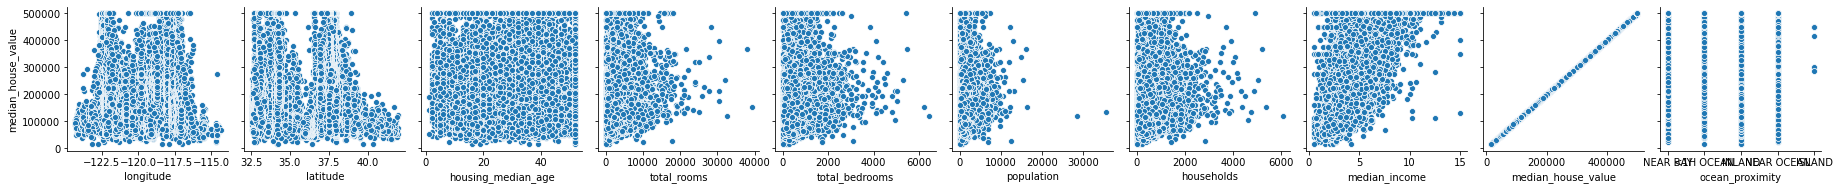

In [5]:
sns.pairplot(df,
            x_vars = df.columns,
             y_vars = "median_house_value")

In [6]:
df.fillna(df.mean(), inplace=True)

If you use StandardScaler, the mean becomes 0 after transforming.

Using Decision Trees

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [8]:
df.drop(columns = ["ocean_proximity"], inplace=True)

In [9]:
X = df.drop(columns = ["median_house_value"])
y = df["median_house_value"]

In [10]:
DTR = DecisionTreeRegressor()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [12]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [13]:
DTR.score(X_train, y_train)

1.0

In [14]:
DTR.score(X_test, y_test)

0.6443799633813616

***

In [15]:
test_pred = DTR.predict(X_test)

In [16]:
residuals = y_test - test_pred

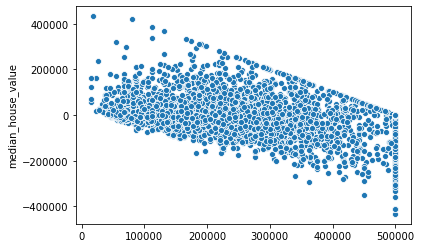

In [19]:
sns.scatterplot(x = test_pred, y = residuals)

One thing we could do is dig into the higher price homes and see if we can overcome the low fit.

__The effect of Decision Tree Hyperparamters__

A hyperparameter is something you can adjust that changes the training process of the model.

In [20]:
def score_decision_tree_with_levels(num_levels):
    DTR_num_levels = DecisionTreeRegressor(max_depth = num_levels)
    DTR_num_levels.fit(X_train, y_train)
    train_score = DTR_num_levels.score(X_train, y_train)
    test_score = DTR_num_levels.score(X_test, y_test)
    return train_score, test_score

In [22]:
score_info = np.array([score_decision_tree_with_levels(n) for n in range(1, 31)])

In [26]:
score_info = pd.DataFrame(data = score_info, columns = ["train_data", "test_data"], index = np.arange(1,31))

In [27]:
import matplotlib.pyplot as plt

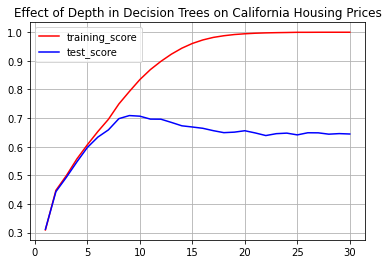

In [32]:
plt.plot(np.arange(1,31), score_info["train_data"], color = "red", label = 'training_score')
plt.plot(np.arange(1,31), score_info["test_data"], color="blue", label = "test_score")
plt.title("Effect of Depth in Decision Trees on California Housing Prices")
plt.legend()
plt.grid()
plt.show()

If you use the testing data too much in model selection, it ceases to be testing data.